In [1]:
import copy
import gensim
from gensim.models import KeyedVectors, Word2Vec
import numpy as np
from tqdm.auto import tqdm

In [2]:
m = 'taiga_upos_skipgram_300_2_2018.vec.gz'
model_taiga = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)

In [2]:
def train_one_model(side: str, year: str):
    path = f'./processed/{side}_{year}.txt'
    with open(path, 'r', encoding='utf-8') as file:
        text = file.read()
        sents = text.split('\n')
        sentences = [sent.split() for sent in sents]
    
    model_new = Word2Vec(size=300, min_count=1)
    model_new.build_vocab(sentences)
    total_examples = model_new.corpus_count
    model_new.build_vocab([list(model_taiga.vocab.keys())], update=True)
    model_new.intersect_word2vec_format("taiga_upos_skipgram_300_2_2018.vec.gz", binary=False, lockf=1.0)
    model_new.train(sentences, total_examples=total_examples, epochs=20)
    
    return model_new

In [3]:
periods = ['2015', '2016', '2017', '2018', '2019']

In [25]:
print('Training loyal models...')
loyal_dict = {}
for year in tqdm(periods):
    loyal_dict[year] = train_one_model('loyal', year)

print('Training opposition models...')
opp_dict = {}
for year in tqdm(periods):
    opp_dict[year] = train_one_model('opp', year)

Training loyal models...



Training opposition models...


Сохраняем модели

In [41]:
for year in opp_dict:
    model = opp_dict[year]
    model.save(f'opp_{year}.model')

In [42]:
for year in loyal_dict:
    model = loyal_dict[year]
    model.save(f'loyal_{year}.model')

Выгружаем сохраненные модели

In [5]:
opp_dict = {}
for year in tqdm(periods):
    opp_dict[year] = Word2Vec.load(f'opp_{year}.model')
    
loyal_dict = {}
for year in tqdm(periods):
    loyal_dict[year] = Word2Vec.load(f'loyal_{year}.model')

In [19]:
opp_dict['2015'].most_similar(['навальный_ADJ'])

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('оппозиционер_NOUN', 0.5735461711883545),
 ('навальный_PROPN', 0.5251793265342712),
 ('полих_NOUN', 0.48325279355049133),
 ('этмановый_ADJ', 0.4725223183631897),
 ('алексей::навальный_PROPN', 0.4624435603618622),
 ('наумец_NOUN', 0.46123024821281433),
 ('грибин_NOUN', 0.46053287386894226),
 ('фбк_UNKN', 0.4455268383026123),
 ('ходорковский_PROPN', 0.4377079904079437),
 ('пивоваров_NOUN', 0.43670496344566345)]

In [6]:
opp_dict['2019'].most_similar(['навальный_ADJ'])

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('навальный_PROPN', 0.5286230444908142),
 ('фбк_UNKN', 0.5021103620529175),
 ('соболь_NOUN', 0.4892120361328125),
 ('гудков_NOUN', 0.4700140357017517),
 ('навальной_ADJ', 0.46325865387916565),
 ('макаркин_NOUN', 0.4591922461986542),
 ('волнянко_NOUN', 0.4539320468902588),
 ('чалый_ADJ', 0.44983214139938354),
 ('навальныйприложение_NOUN', 0.4494408369064331),
 ('дюмин_NOUN', 0.4341442286968231)]

In [7]:
loyal_dict['2015'].most_similar(['навальный_ADJ'])

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('оппозиционер_NOUN', 0.5518743991851807),
 ('ярмыш_NOUN', 0.4763646125793457),
 ('равелевый_ADJ', 0.47355926036834717),
 ('диденко_NOUN', 0.4733172059059143),
 ('стадников_NOUN', 0.4720117151737213),
 ('лубинский_ADJ', 0.4668305516242981),
 ('дмитрашковский_ADJ', 0.4622555375099182),
 ('ларюшкина_NOUN', 0.4612876772880554),
 ('карелов_NOUN', 0.4580008089542389),
 ('яблоков_NOUN', 0.4579685926437378)]

In [8]:
loyal_dict['2019'].most_similar(['навальный_ADJ'])

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('оппозиционер_NOUN', 0.5602043271064758),
 ('вуцана_NOUN', 0.4865356683731079),
 ('титовский_ADJ', 0.470297634601593),
 ('ситникова_NOUN', 0.46860286593437195),
 ('копайгородский_ADJ', 0.4620201587677002),
 ('еськов_NOUN', 0.45652228593826294),
 ('хузин_NOUN', 0.4562341868877411),
 ('ананьев_NOUN', 0.4552423357963562),
 ('гордеев_NOUN', 0.4544682800769806),
 ('фомин_NOUN', 0.45237165689468384)]

In [9]:
opp_dict['2015'].most_similar(['крым_NOUN'])

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('полуостров_NOUN', 0.6085213422775269),
 ('крымский_ADJ', 0.5300272107124329),
 ('севастополь_NOUN', 0.47392576932907104),
 ('приднестровье_NOUN', 0.43056878447532654),
 ('донбасс_NOUN', 0.42487943172454834),
 ('крым_PROPN', 0.3991786241531372),
 ('симферополь_NOUN', 0.3902466893196106),
 ('аннексия_NOUN', 0.3775333762168884),
 ('украина_NOUN', 0.36832404136657715),
 ('чубаров_NOUN', 0.3618803024291992)]

In [10]:
opp_dict['2019'].most_similar(['крым_NOUN'])

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('аннексия_NOUN', 0.589365541934967),
 ('донбасс_NOUN', 0.5868943333625793),
 ('крым_PROPN', 0.5631927847862244),
 ('крыма_PROPN', 0.5209295749664307),
 ('россия::крым_PROPN', 0.5002427697181702),
 ('аннексировать_VERB', 0.4893297851085663),
 ('хачукаев_NOUN', 0.48530858755111694),
 ('присоединение_NOUN', 0.47728589177131653),
 ('абхазия_PROPN', 0.47104382514953613),
 ('крым::украина_PROPN', 0.4505152106285095)]

In [11]:
loyal_dict['2015'].most_similar(['крым_NOUN'])

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('полуостров_NOUN', 0.6549680829048157),
 ('крымский_ADJ', 0.531373143196106),
 ('импэксбанк_NOUN', 0.44327694177627563),
 ('регион_NOUN', 0.3809986114501953),
 ('батилиман_NOUN', 0.37878745794296265),
 ('турава_NOUN', 0.36600813269615173),
 ('евпатория_NOUN', 0.35473009943962097),
 ('калистрат_NOUN', 0.3517370820045471),
 ('симферополь_NOUN', 0.35069143772125244),
 ('донбасс_NOUN', 0.34600186347961426)]

In [20]:
loyal_dict['2019'].most_similar(['крым_NOUN'])

C:\anaconda\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  """Entry point for launching an IPython kernel.


[('полуостров_NOUN', 0.5342103242874146),
 ('аннексия_NOUN', 0.45983052253723145),
 ('крымский_ADJ', 0.3992033004760742),
 ('донбасс_NOUN', 0.3761840760707855),
 ('севастополь_NOUN', 0.3759874701499939),
 ('беларусь_NOUN', 0.3656488060951233),
 ('крым_PROPN', 0.3555224537849426),
 ('крымчанин_NOUN', 0.35503387451171875),
 ('суверенитет_NOUN', 0.3539305329322815),
 ('новороссия_NOUN', 0.33207380771636963)]

## Элайнмент

In [6]:
from scipy.linalg import orthogonal_procrustes

def align_models(model_i: Word2Vec, model_main=loyal_dict['2015']) -> KeyedVectors:
    print('Main model vocab size:', len(model_main.wv.vocab))
    print('Model to-be-aligned vocab size:', len(model_i.wv.vocab))
    
    m1 = copy.deepcopy(model_main)
    m2 = copy.deepcopy(model_i)
    
    vocab_m1 = set(m1.wv.vocab.keys())
    vocab_m2 = set(m2.wv.vocab.keys())

    common_vocab = vocab_m1&vocab_m2

    if not vocab_m1-common_vocab and not vocab_m2-common_vocab:
        new_main, new_i = m1, m2
    else:
        common_vocab = list(common_vocab)
        common_vocab.sort(key=lambda w: m1.wv.vocab[w].count + m2.wv.vocab[w].count, reverse=True)

        for m in [m1, m2]:
            indices = [m.wv.vocab[w].index for w in common_vocab]
            old_arr = m.wv.vectors
            new_arr = np.array([old_arr[index] for index in indices])
            m.wv.vectors = new_arr

            m.wv.index2word = common_vocab
            old_vocab = m.wv.vocab
            new_vocab = {}

            for new_index, word in enumerate(common_vocab):
                old_vocab_obj=old_vocab[word]
                new_vocab[word] = gensim.models.word2vec.Vocab(index=new_index, count=old_vocab_obj.count)
                m.wv.vocab = new_vocab
        new_main, new_i = m1, m2
    
    S_main = new_main[new_main.wv.vocab]
    S_i = new_i[new_i.wv.vocab]
        
    M_i = model_i[model_i.wv.vocab]
    O, _ = orthogonal_procrustes(S_main, S_i)
    M_i_new = M_i @ O
    
    aligned_model = KeyedVectors(300)
    aligned_model.add(list(model_i.wv.vocab.keys()), M_i_new, replace=True)
    
    return aligned_model

In [20]:
print('Aligning opposition models...')
aligned_opp_dict = {}
for year in tqdm(opp_dict):
    al_mod = align_models(opp_dict[year])
    aligned_opp_dict[year] = al_mod
    
print('Aligning loyal models...')
aligned_loyal_dict = {}
for year in tqdm(loyal_dict):
    al_mod = align_models(loyal_dict[year])
    aligned_loyal_dict[year] = al_mod

Aligning opposition models...


Main model vocab size: 292715
Model to-be-aligned vocab size: 292075


C:\anaconda\lib\site-packages\ipykernel_launcher.py:37: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\anaconda\lib\site-packages\ipykernel_launcher.py:38: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
C:\anaconda\lib\site-packages\ipykernel_launcher.py:40: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).


Main model vocab size: 292715
Model to-be-aligned vocab size: 283893
Main model vocab size: 292715
Model to-be-aligned vocab size: 288897
Main model vocab size: 292715
Model to-be-aligned vocab size: 269610
Main model vocab size: 292715
Model to-be-aligned vocab size: 271655

Aligning loyal models...


Main model vocab size: 292715
Model to-be-aligned vocab size: 292715
Main model vocab size: 292715
Model to-be-aligned vocab size: 264644
Main model vocab size: 292715
Model to-be-aligned vocab size: 308011
Main model vocab size: 292715
Model to-be-aligned vocab size: 282899
Main model vocab size: 292715
Model to-be-aligned vocab size: 268136



In [23]:
for year in aligned_loyal_dict:
    model = aligned_loyal_dict[year]
    model.save(f'aligned_to_2015_loyal_{year}.model')

for year in aligned_opp_dict:
    model = aligned_opp_dict[year]
    model.save(f'aligned_to_2015_opp_{year}.model')

In [8]:
aligned_opp_dict = {}
for year in tqdm(periods):
    aligned_opp_dict[year] = Word2Vec.load(f'aligned_to_2015_opp_{year}.model')
    
aligned_loyal_dict = {}
for year in tqdm(periods):
    aligned_loyal_dict[year] = Word2Vec.load(f'aligned_to_2015_loyal_{year}.model')

KeyboardInterrupt: 

In [19]:
aligned_opp_dict

{}

## Визуализация

In [14]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [15]:
def get_all_vectors(word: str, side: str):
    periods = ['2015', '2016', '2017', '2018', '2019']
    labels = []
    vectors = []
    
    if side == 'loyal':
        models = aligned_loyal_dict
    elif side == 'opp':
        models = aligned_opp_dict
    
    all_neighbours = []
    for year in periods[::-1]:  #  идем обратно, чтобы учитывать только последних соседей из повторяющихся
        word_label = word.split('_')[0] + '_' + year
        labels.append(word_label)
        vectors.append(models[year][word])
        neighbours = models[year].most_similar([word], topn=7)
        
        for neigh, distance in neighbours:
            if neigh not in all_neighbours:
                all_neighbours.append(neigh)
                neigh_label = neigh.split('_')[0]
                labels.append(neigh_label)
                vectors.append(models[year][neigh])
    
    return labels, vectors 

In [11]:
def get_coordinates(word:str, side: str):
    labels, vectors = get_all_vectors(word, side)
    X = np.array(vectors)
    X_embedded = TSNE(perplexity=10, n_components=2, learning_rate=500, random_state=42).fit_transform(X)
    
    x = X_embedded[:,0]
    y = X_embedded[:,1]

    #  выбрать только точки с таргет-словом
    target_idxs = []
    for idx, label in enumerate(labels):
        if '_' in label:
            target_idxs.append(idx)
    x_target = x[target_idxs]
    y_target = y[target_idxs]
    
    return labels, x, y, x_target, y_target

In [39]:
def vizualize_side_by_side(word: str):    
    labels_l, x_l, y_l, x_target_l, y_target_l = get_coordinates(word, 'loyal')
    labels_o, x_o, y_o, x_target_o, y_target_o = get_coordinates(word, 'opp')
    
    plt.figure(figsize=(16, 8)) 
    
    plt.subplot(1, 2, 1) # row 1, col 2 index 1
    plt.scatter(x_l, y_l)
    plt.title("Loyal newspapers")
    for i, word in enumerate(labels_l):
        if '_' in word:
            plt.annotate(word, alpha=1, xy=(x_l[i], y_l[i]), weight='bold', color='red')
        else:
            plt.annotate(word, alpha=1, xy=(x_l[i], y_l[i]))
    plt.plot(x_target_l, y_target_l, 'r')

    plt.subplot(1, 2, 2) # index 2
    plt.scatter(x_o, y_o)
    plt.title("Opposition newspapers")
    for i, word in enumerate(labels_o):
        if '_' in word:
            plt.annotate(word, alpha=1, xy=(x_o[i], y_o[i]), weight='bold', color='red')
        else:
            plt.annotate(word, alpha=1, xy=(x_o[i], y_o[i]))
    plt.plot(x_target_o, y_target_o, 'r')

    plt.show()

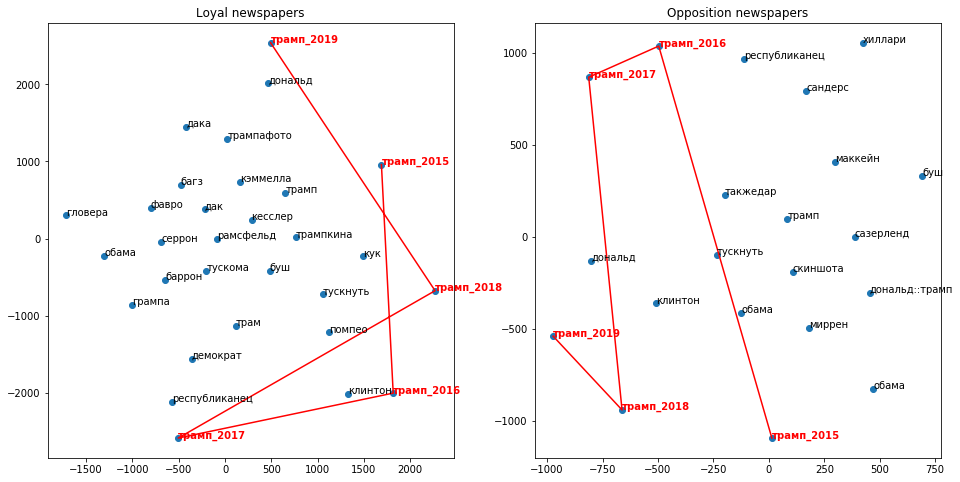

In [61]:
vizualize_side_by_side('трамп_NOUN')

### Несколько непринятых попыток визуализаций

In [16]:
def visualize(word: str, side='loyal'):
    labels, vectors = get_all_vectors(word, side)
    X = np.array(vectors)
    X_embedded = TSNE(perplexity=10, n_components=2, learning_rate=500, random_state=42).fit_transform(X)
    
    x = X_embedded[:,0]
    y = X_embedded[:,1]

    #  выбрать только точки с таргет-словом
    target_idxs = []
    for idx, label in enumerate(labels):
        if '_' in label:
            target_idxs.append(idx)
    x_target = x[target_idxs]
    y_target = y[target_idxs]

    plt.figure(figsize=(13, 8))
    plt.scatter(x, y, label=labels)
    for i, word in enumerate(labels):
        plt.annotate(word, alpha=0.8, xy=(x[i], y[i]))
    plt.plot(x_target, y_target, '-')
    
    

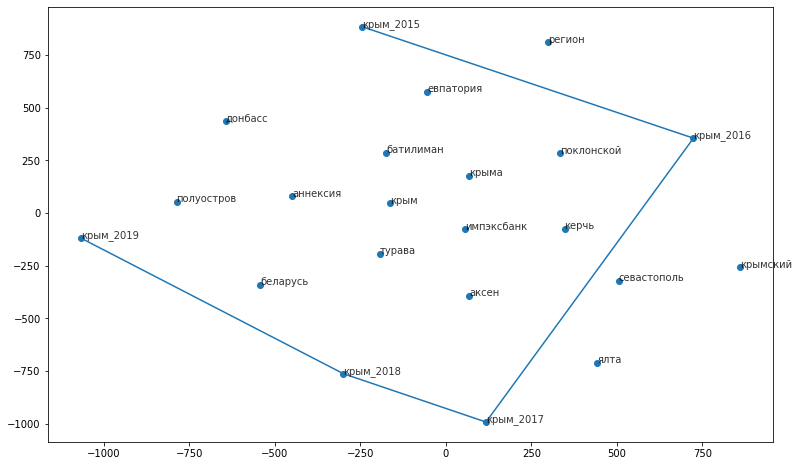

In [168]:
visualize('крым_NOUN', side='loyal')

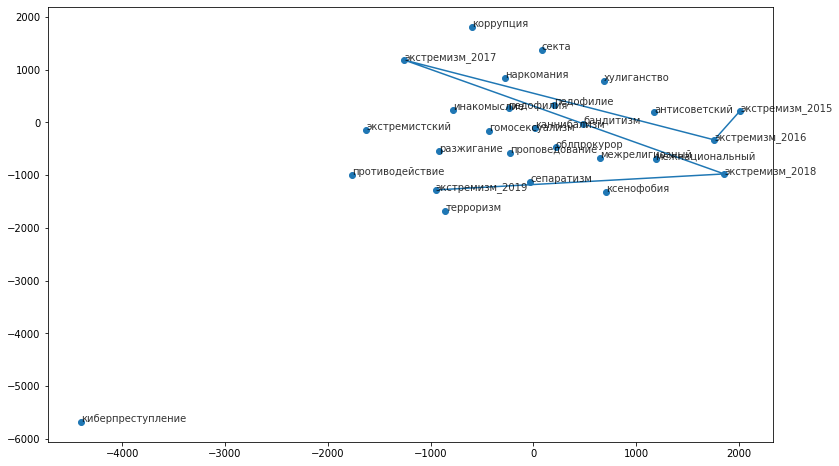

In [136]:
visualize('экстремизм_NOUN', side='opp')

In [164]:
def visualize_both(word: str):
    labels_l, vectors_l = get_all_vectors(word, 'loyal')
    labels_o, vectors_o = get_all_vectors(word, 'opp')
    labels = labels_l + labels_o
    bias = len(vectors_l)
    color = ['b']*len(labels_l) + ['r']*len(labels_o)

    X = np.concatenate((np.array(vectors_l), np.array(vectors_o)), axis=0)
    X_embedded = TSNE(perplexity=10, n_components=2, learning_rate=500, random_state=42).fit_transform(X)
    
    x = X_embedded[:,0]
    y = X_embedded[:,1]

    #  выбрать только точки с таргет-словом
    target_idxs_l = []
    for idx, label in enumerate(labels_l):
        if '_' in label:
            target_idxs_l.append(idx)
    x_target_l = x[target_idxs_l]
    y_target_l = y[target_idxs_l]
    
    target_idxs_o = []
    for idx, label in enumerate(labels_o):
        if '_' in label:
            target_idxs_o.append(idx+bias)
    x_target_o = x[target_idxs_o]
    y_target_o = y[target_idxs_o]

    plt.figure(figsize=(13, 8))
    plt.scatter(x, y, c=color, label=labels, alpha=0.8)
    for i, word in enumerate(labels):
        plt.annotate(word, alpha=0.8, xy=(x[i], y[i]))
        
    plt.plot(x_target_l, y_target_l, 'b')    
    plt.plot(x_target_o, y_target_o, 'r')
    
    
    

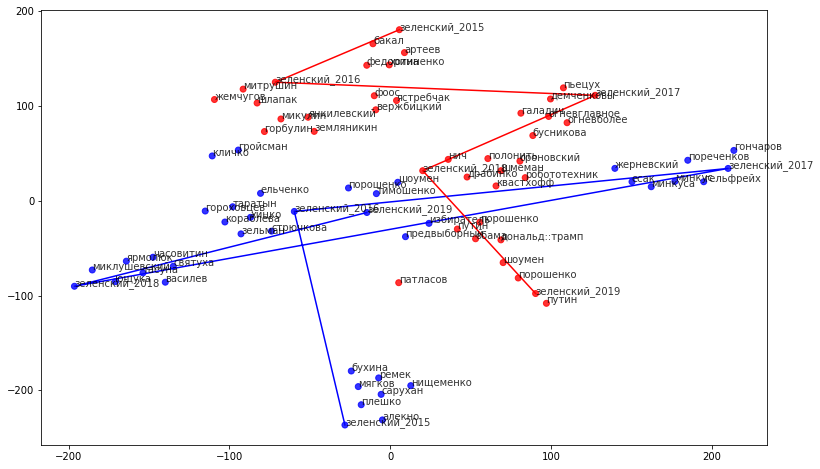

In [167]:
visualize_both('зеленский_ADJ')